# 1. Necessary imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Load data from csv

In [22]:
heartD_df = pd.read_csv('heart_2020_cleaned.csv')
heartD_df.head()
#heartD_df.size
heartD_df.shape

(319795, 18)

# 3. Analyze dataset before preprocessing

### 3.1 Checking data types 

In [24]:
heartD_df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

### 3.2 Checking Categories Across Multiple Columns

In [25]:
# List of columns contains unique categories
columns_to_check = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 
                    'Stroke', 'DiffWalking', 'Sex', 'Race', 
                    'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'AgeCategory']

for column in columns_to_check:
    print(f"Categories in column '{column}':")
    print(heartD_df[column].value_counts())
    print()

Categories in column 'HeartDisease':
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

Categories in column 'Smoking':
Smoking
No     187887
Yes    131908
Name: count, dtype: int64

Categories in column 'AlcoholDrinking':
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

Categories in column 'Stroke':
Stroke
No     307726
Yes     12069
Name: count, dtype: int64

Categories in column 'DiffWalking':
DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64

Categories in column 'Sex':
Sex
Female    167805
Male      151990
Name: count, dtype: int64

Categories in column 'Race':
Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64

Categories in column 'PhysicalActivity':
PhysicalActivity
Yes    247957
No      71838
Name: c

### 3.3 Check for missing values in columns

In [26]:
# Check for missing values in columns
missing_values = heartD_df.isnull().sum()

# Print columns with missing values (if any)
columns_with_missing_values = missing_values[missing_values > 0]
if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    print(columns_with_missing_values)
else:
    print("No missing values found in any column.")

No missing values found in any column.


# 4. Preprocessing

Identified Preprocessing steps:
* Extract only "Yes" and "No" values from the "Diabetic" column.
* Apply one-hot encoding to object type columns and Convert them into numeric representations.

In [27]:
# Create a new DataFrame for the converted columns
converted_df = heartD_df.copy()

# Extract only "Yes" and "No" values from the "Diabetic" column
converted_df['Diabetic'] = converted_df['Diabetic'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')

# Define dictionaries for conversion
sex_cat_dct = {'Female': 0, 'Male': 1}
yes_no_dct = {'Yes': 1, 'No': 0}
genHealth_dct= {'Poor':1, 'Fair':2, 'Good':3, 'Very good':4, 'Excellent':5}

ageCategory_dct= {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5,
   '50-54':6, '55-59':7, '60-64':8, '65-69':9, '70-74':10, '75-79':11,
   '80 or older':12}

# Define columns to be converted and their corresponding dictionaries
columns_to_convert = {
    'Sex': sex_cat_dct,
    'GenHealth': genHealth_dct,
    'AgeCategory': ageCategory_dct,
    'Diabetic':yes_no_dct,
    'HeartDisease': yes_no_dct,
    'Smoking': yes_no_dct,
    'AlcoholDrinking': yes_no_dct,
    'Stroke': yes_no_dct,
    'DiffWalking': yes_no_dct,
    'PhysicalActivity': yes_no_dct,
    'Asthma': yes_no_dct,
    'KidneyDisease': yes_no_dct,
    'SkinCancer': yes_no_dct,
}

# Convert columns using dictionaries
for column, dct in columns_to_convert.items():
    converted_df[column] = converted_df[column].map(dct)

# Apply one-hot encoding to the 'Race' column and concatenate with converted_df
race_encoded = pd.get_dummies(converted_df['Race'], dtype=int)
converted_df = pd.concat([converted_df, race_encoded], axis=1)
converted_df.drop('Race', axis=1, inplace=True)

# Remove duplicate rows considering all columns
df_no_duplicates = converted_df.drop_duplicates()

# Display the new DataFrame with converted columns
df_no_duplicates.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3.0,30.0,0,0,7,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,8.0,0,0,0,0,0,0,0,0,1
5,1,28.87,1,0,0,6.0,0.0,1,0,11,...,12.0,0,0,0,0,0,1,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,...,4.0,1,0,1,0,0,0,0,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,...,9.0,1,0,0,0,0,0,0,0,1
8,0,26.45,0,0,0,0.0,0.0,0,0,12,...,5.0,0,1,0,0,0,0,0,0,1
9,0,40.69,0,0,0,0.0,0.0,1,1,9,...,10.0,0,0,0,0,0,0,0,0,1


# 5. Set Independed Variables and Dependent Variables

In [28]:
df_no_duplicates.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'American Indian/Alaskan Native',
       'Asian', 'Black', 'Hispanic', 'Other', 'White'],
      dtype='object')

In [29]:
# picked columns
feature_df = df_no_duplicates[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'American Indian/Alaskan Native',
       'Asian', 'Black', 'Hispanic', 'Other', 'White']]

# Independed Variables
X = np.asarray(feature_df)

# Dependent variable
y = np.asarray(df_no_duplicates['HeartDisease'])
y[0:5]

array([0, 0, 0, 0, 0])

# 6. Divide the data set as Train and Test data set

In [30]:
'''
heartD_df(319795 rows) ---> Train (80%), Test (20%)
X is 2D array
y is 1D array
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

# 31979 * 22
X_train.shape

# 287816 * 22
X_train.shape
df_no_duplicates.shape

(301166, 23)

# 7. Modeling (SVM with Scikit-learn)

In [31]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', degree=2)
classifier.fit(X_train[:10000], y_train[:10000])

y_predict = classifier.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

# 8. Evaluation

In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import precision_score, recall_score, f1_score 

print("Accuracy score")
print(metrics.accuracy_score(y_test,y_predict))

Accuracy score
0.910449247933061


training score = 0.9092565537164014
testing score = 0.910449247933061
Confusion matrix for SVM
[[54840     0]
 [ 5394     0]]
Accuracy for SVM = 91.04492479330611%
Precision for SVM = 0.0000
Recall for SVM = 0.0000
F1-score for SVM = 0.0000


/home/fernando-mrr/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


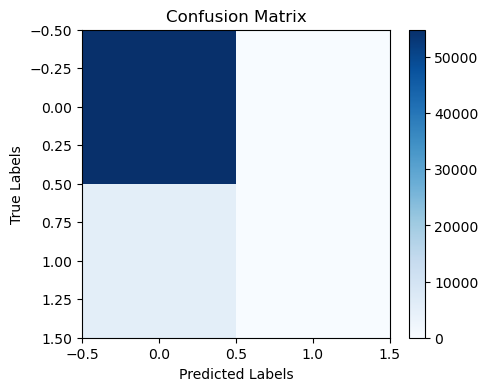

In [33]:
# Accuracy of predicted data with the actual data 

train = classifier.score(X_train, y_train) 

test = classifier.score(X_test, y_test) 

  

print(f"training score = {train}") 

print(f"testing score = {test}") 

  

# Create DataFrame with actual and predicted values 

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict}) 
 

#Calculate and print performance metrics 

predictions_tree = classifier.predict(X_test) 

accuracy_tree = classifier.score(X_test, y_test) 

confusion_matrix_tree = confusion_matrix(y_test, y_predict) 

precision = precision_score(y_test, y_predict) 

recall = recall_score(y_test, y_predict) 

f1 = f1_score(y_test, y_predict) 

  

print("Confusion matrix for SVM") 

print(confusion_matrix_tree) 

print(f"Accuracy for SVM = {accuracy_tree*100}%") 

print(f"Precision for SVM = {precision:.4f}")  

print(f"Recall for SVM = {recall:.4f}")  

print(f"F1-score for SVM = {f1:.4f}")   

  

  

#visualize confusion matrix 

plt.figure(figsize=(5, 4))  

plt.imshow(confusion_matrix_tree, cmap=plt.cm.Blues) 

plt.xlabel("Predicted Labels") 

plt.ylabel("True Labels") 

plt.title("Confusion Matrix") 

plt.colorbar() 

plt.show() 